# Linear Regression in Python

```{admonition} Learning Objectives
:class: tip
In this tutorial, you will learn how to code a linear regressor in python. The steps will be detailed and the present document will show you basic commands in python to get started. 

Main goals:
* __Code a linear regressor to fit a dataset of one independent variable with its target__
* __Display visualization of the gradient descent__

What will also be covered:
* How to load and explore a dataset
* How to plot with Matplotlib
* How to define custom functions
* How to printout and store intermediary results
* How to structure and comment code
```

```{warning} Boring alert!
You have coded before and you are done already?  
Come talk to me, I will give you extra challenges.
```

Let's now open a fresh Jupyter Notebook on Colaboratory and follow along! To create a blank Colaboratory document, go to your GDrive first. On the top left of the screen there is a "`+`" button. Click on it, the drop menu will show several options with "More" at the bottom: hover it and you will see another drop down menu where you can click on Colaboratory.


## Get the data
The first step is to get the dataset. It can be accessed [here](https://drive.google.com/drive/folders/1da4mGMShDA8KkbgifNYaIKD_sY3Pit2C?usp=sharing). We will see how to localize, explore and load it. 

### Connect 
First, get to the shared folder, right click on the `.csv` file and select "Add shortcut to Drive." This will allow you to access the folder from your drive! 
Then in your Colaboratory tab, write and execute the following lines:
```python
from google.colab import drive
drive.mount('/content/gdrive')
```

### Localizing the file  
In Jupyter Notebook, it is possible to write bash commands (the language used in a console, or terminal) by appending a `!` at front of a code cell.

The `pwd` command  stands for "print working directory" and will show you were you are currently running your code. 
```bash
!pwd
```

To list files, use the `ls` command of `ls -l` to display more details:
```bash
!ls -l
```

```{tip}
Once you locate where your data file is in your drive, it is a good practice to store its path, i.e. the string of character matching all the directory and subdirectories, in a variable (usually named `path`).
```

### Exploring the file  
````{margin}
```{warning}
Caution: the path in the code example may not match your local folder. You may have to adapt the command with your file's location.
```
````
Often you will not know how data is presented in a file. In bash, the `cat` command will display the entire content of a text file. But caution: your file can have thousands of lines! What is usually relevant to see is e.g. if the file has a header row. The command that displays the first rows is `head`. By default it will show 10 rows, but you can tweak this number with the `-n` option:


In [2]:
!head -n 5 ../data/tutorial_1.csv

x,y
5.4881350392732475,29.65450786127179
7.151893663724195,34.99358978951999
6.027633760716439,35.99427342345802
5.448831829968968,24.815775427356154



Too see how many lines your file has, use the "word count" command `wc` with the `-l` option for line:

In [4]:
! wc -l ../data/tutorial_1.csv

      51 ../data/tutorial_1.csv


This is useful to know which amount of data we are dealing with.  
And we also see the file has a header row. Let's now load its content in a pythonic way.

### From csv to dataframe 
A dataframe is a data structure from the pandas software library designed for tabular data. It can be compared to an array with rows and columns that can be modified in an intuitive way for the programmer. Pandas allows importing data from various file formats. There is a special method for loading the content from a `.csv` file:

In [5]:
import pandas as pd

filename = "../data/tutorial_1.csv"
df = pd.read_csv(filename)
df.head()

,x,y
0,5.488135,29.654508
1,7.151894,34.993590
2,6.027634,35.994273
3,5.448832,24.815775
4,4.236548,21.034960


Jupyter Notebook offers a nice display of tabular data structure, with indexed rows and column names. It's very convenient to explore a file. However even the `head` method can not fit in the terminal if the file contains lots of columns (features). It's possible to print the columns names using the `keys` command: `df.keys()`.

### From dataframe to NumPy arrays
Let's now store each column into a python list, as it will be handy for plotting and coding our regressor. Python has lists but we will use a more advanced object from the [NumPy](https://en.wikipedia.org/wiki/NumPy) library, which is efficiently coded to perform mathematical operations on multi-dimensional arrays and matrices. This will store each column as a `NumPy` array: 

In [18]:
import numpy as np

x = df['x'].to_numpy()
y = df['y'].to_numpy()
len(x)  # print number of elements

numpy.ndarray

## Plot the data
Let's use the `matplotlib.pyplot` library to make a scatter plot of the data:

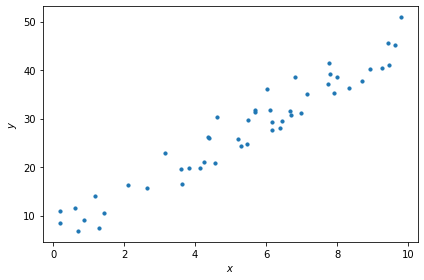

In [20]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.scatter(x, y, s=10)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
plt.tight_layout()

## Writing functions
We will have to make the same computations several times, for instance while calculating the hypothesis function. Thus it is better to define proper functions for that. Here is a demo with the hypothesis function:

In [21]:
def h_lin(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

Your first mission is to write a function calculating the cost $J(\theta_0, \theta_1)$.
```{admonition} Good Practice
:class: important
Before even starting to write code it is important to be very clear on what are the inputs, the main steps, the outputs. I recommend going back to the 'pen and paper' to first write the algorithm, list the different variables. Then it will make the coding much easier and less error-prone.
```


There will be another handy function to code. Recall the derivative of the cost function. It contains the difference between the predicted value and the observed one, without them being squared. This difference has the technical name of "residual". You will write another function `get_residuals()` computing the residuals, which is common in both partial derivatives $\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_i}$.

Questions are summarized at the end of the document for convenience. Hints will be given during the tutorial to guide you.

__Test your code__  
Once you have your function computing the cost, it is always a good practice to test it. Let's take the values seen in class from the plot of the {ref}`Perfectly aligned 4 points<plot_linReg_1234>`. Use your function to check that the cost is zero for $\theta_1$ = 2. You will have to complete it with the proper variables to pass to the cost function (instead of the `...` placeholder):

```python
x_test = np.array([1, 2, 3, 4])
y_test = np.array([2, 4, 6, 8])

# No intercept term
theta_0 = 0 

# List of values for theta 1:
theta_1_vals = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]

for ... in ... :
    cost = costFunctionLinRegression( ... )
    print(f"With theta 1 = {theta_1:.1f}\tcost = {cost:.2f}")
```

Let's now get to the core of things: the regressor!

## Linear regressor
A skeleton of the code is given below to help you get started. You will have to tweak the hyperparameters and initial $\theta$ parameters. 

```python

# Hyperparameters
alpha = 
N = 

# Initialization
theta_0 = 
theta_1 = 

# Check lists of x and y are of same length:
m = len(x) # sample size
if m != len(y): raise ValueError('The lists of x and y values are not the same length!')

# Store theta (weights) values for Gradient Descent (GD) visualizations
GD_all_thetas_0 = np.array([theta_0])
GD_all_thetas_1 = np.array([theta_1])

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for n in range(1, N+1):

    #___________________________

    # Your code here


    #___________________________

print(f"\nEnd of gradient descent after {n} iterations")
```


## Printouts
While in the process of writing code and testing its parts, it is good to print in the terminal some values for checks. But not all the values for each iteration! There will be too many lines in the terminal and it will be difficult to see the trend (if the gradient converges or not).

To print selected values, e.g. every 100 iterations, use the modulo `%` operator:

In [30]:
for i in range (1,501):
    if i%100 == 0:
        print(f"Iteration {i}")

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500


You may have to display values more often at the beginning, as the gradient descent will work its way quite fast towards a good approximation of the optimized parameter values, then the rest of the iterations will be refining those values. 

## Visualization of Gradient Descent
Let's reproduce the plots from the lecture, Figure {numref}`plot_linReg_3D` to visualize the trajectory of the gradient descent in the theta parameter space. 

### Storing intermediary parameter values
For this you will have to append to the lists `weights_GD_0` and `weights_GD_1` the intermediary theta values.  

### Plotting macros 3D and contour
Below are examples on how to make a 3D plot and a contour plot for inspiration.

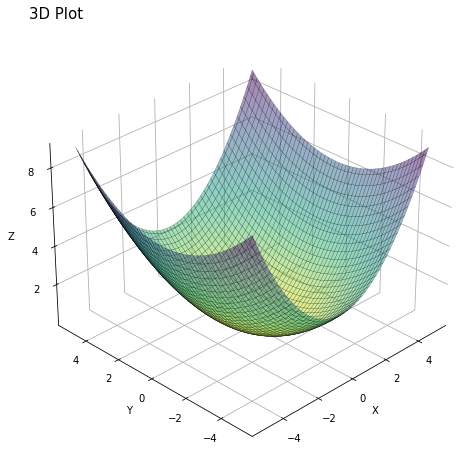

In [42]:
# Generating data input points
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)

# Creating elliptical plane
Z = (X**2)/4 + (Y**2)/9

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Drawing contour plot
surf = ax.plot_surface(X,Y,Z, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')

# Set plot and axis titles (and white background)
plt.title('3D Plot', loc='left', fontsize = 15)
ax.set_xlabel('X'); ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_ylabel('Y'); ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zlabel('Z'); ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# To change plot view angle 
ax.azim = 225
ax.elev = 30 

The 2D representation of this 3D plot above can be coded this way:

9.0 6.0


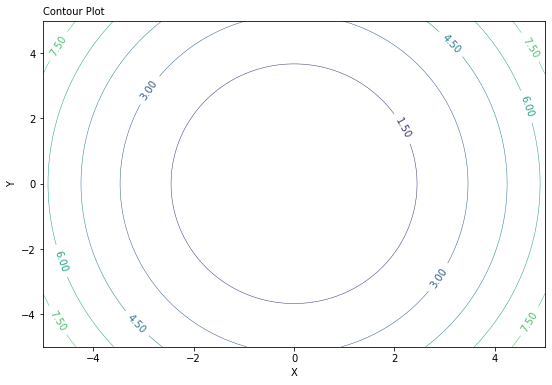

In [41]:
fig, ax = plt.subplots(figsize= (9, 6))

CS = ax.contour(X,Y,Z, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt='%.2f')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Contour Plot', loc='left', fontsize = 10)

fig_width, fig_height = plt.gcf().get_size_inches()

## Summary of the mission

Here is a summary of your mission:

1. Functions
   1. Write a function calculating the cost $J(\theta_0, \theta_1)$
   1. Write a function calculating the residuals $y^\text{pred} - y^\text{obs}$
   1. Test your functions to check they run and compute the right thing
1. Take the linear regressor skeleton and complete the `for` loop
   1. List the main steps (pen and paper!)
   1. Call the functions
   1. Implement printouts of relevant variables
1. Visualize the gradient descent
   1. Modify your regressor to store intermediary $\theta$ parameter values
   1. Plot the 3D visualization of the cost vs $\theta_0$ and $\theta_1$ 
   1. Add the stored intermediary $\theta$ parameter values (use the `plot` method)
   1. Plot the 2D contour of the cost vs $\theta_0$ and $\theta_1$
   1. Add the stored intermediary $\theta$ parameter values (use the `plot` method)

__Bonus: compare with SciPy optimizer__  
The [SciPy library](https://en.wikipedia.org/wiki/SciPy) contains numerous mathematical tools, including an optimizer. You can use the code to get the optimized $\theta$ values and compare with the ones you found with your linear regressor:
```python
def residuals_func(v, x, y):
    return y - (v[1]*x+v[0])

res = scipy.optimize.least_squares(residuals_func, x0=[0, 0], args=(x,y))
print(f"SciPy MSE optimizer best-fit line: {res.x[1]:.3f} X + {res.x[0]:.3f}")
```